<div align="center">

## BIKE RENTAL ANALYSIS - MODEL TRAINING

</div>

The aim is to build model which will be able to predict number of rents based on informations like temprature, weekday, windspeed, month and weather.

**Necessary libriaries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

**Uploading prepared data to pandas - CSV file**

In [2]:
# Dataset
df = pd.read_csv('cleaned_day_data_v2.csv')

# Transforming 'holiday' from Yes/No on 1/0
df['holiday'] = df['holiday'].map({'Yes': 1, 'No': 0})

# Change bool on int in columns season_*
season_cols = [col for col in df.columns if col.startswith('season_') and not any(s in col for s in ['.1', '.2'])]
df[season_cols] = df[season_cols].astype(int)


df = df[[col for col in df.columns if not any(suffix in col for suffix in ['.1', '.2'])]]

# 🧠 One-hot encoding for mnth
df = pd.get_dummies(df, columns=['mnth'], prefix='month', drop_first=False)

# Adding 'dteday' if not exist (deleted unnecessarily in the previous notebook)
if 'dteday' not in df.columns:
    df['dteday'] = pd.date_range(start='2011-01-01', periods=len(df), freq='D')

# 🔁 Rolling averages
df = df.sort_values('dteday')
df['cnt_rolling_3'] = df['cnt'].rolling(window=3).mean().fillna(method='bfill')
df['cnt_rolling_7'] = df['cnt'].rolling(window=7).mean().fillna(method='bfill')

# Interactions
df['temp_x_weekdayt'] = df['temp'] * df['weekdayt']
df['humidity_x_workingday'] = df['hum'] * df['workingday']

df.head()



C:\Users\Z004RMER\AppData\Local\Temp\ipykernel_12516\1400576858.py:23: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['cnt_rolling_3'] = df['cnt'].rolling(window=3).mean().fillna(method='bfill')
C:\Users\Z004RMER\AppData\Local\Temp\ipykernel_12516\1400576858.py:24: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['cnt_rolling_7'] = df['cnt'].rolling(window=7).mean().fillna(method='bfill')


,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,month_March,month_May,month_November,month_October,month_September,dteday,cnt_rolling_3,cnt_rolling_7,temp_x_weekdayt,humidity_x_workingday
0,winter,0,0,Saturday,0,Mist/Cloudy,0.344167,0.363625,0.805833,0.160446,...,False,False,False,False,False,2011-01-01,1045.000000,1344.714286,2.065002,0.000000
1,winter,0,0,Sunday,0,Mist/Cloudy,0.363478,0.353739,0.696087,0.248539,...,False,False,False,False,False,2011-01-02,1045.000000,1344.714286,0.000000,0.000000
2,winter,0,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,...,False,False,False,False,False,2011-01-03,1045.000000,1344.714286,0.196364,0.437273
3,winter,0,0,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,...,False,False,False,False,False,2011-01-04,1237.333333,1344.714286,0.400000,0.590435
4,winter,0,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,...,False,False,False,False,False,2011-01-05,1503.666667,1344.714286,0.680871,0.436957


In [3]:
df.columns

Index(['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'weekdayt', 'is_weekend', 'temp_celsius', 'season_fall',
       'season_spring', 'season_summer', 'season_winter', 'weathersit_encoded',
       'month_April', 'month_August', 'month_December', 'month_February',
       'month_January', 'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September', 'dteday',
       'cnt_rolling_3', 'cnt_rolling_7', 'temp_x_weekdayt',
       'humidity_x_workingday'],
      dtype='object')

**Selecting the target columns which will be the number of rentals and the feature which will be the columns that have the greatest impact on the target value. Based on the initial analysis, such columns are 'temp', 'weekday', 'month', 'weather', 'windspeed', 'humy'.**

In [4]:
# 🎯 Przygotowanie danych
features = ['temp', 'weekdayt', 'weathersit_encoded', 'windspeed', 'hum', 'holiday', 'workingday']
features += [col for col in df.columns if col.startswith('month_')]
features += ['cnt_rolling_3', 'cnt_rolling_7', 'temp_x_weekdayt', 'humidity_x_workingday']

X = df[features]
y = df['cnt']

# 🔀 Podział na trening/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Splitting the data into training and test sets**

X_train, y_train ==> Training data

X_test, y_test ==> Test data

test_size ==> Size of test data

random_state ==> value responsible for randomness of division

**Creating linear regression model**

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Checking quality of the model**

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse}")
print(f"R2 Score: {r2}")
print(f"RMSE: {rmse}")

MSE: 453386.93150262494
R2 Score: 0.8869326082729503
RMSE: 673.3401306194552


**Features importance**

In [7]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)

                  Feature  Coefficient
0                    temp  1356.936843
1                weekdayt    37.662214
2      weathersit_encoded  -528.057108
3               windspeed -1145.244289
4                     hum  -354.659191
5                 holiday  -151.401542
6              workingday   501.465002
7             month_April   136.898788
8            month_August  -329.764401
9          month_December   123.891966
10         month_February   105.685182
11          month_January   234.759433
12             month_July  -487.414590
13             month_June  -278.946672
14            month_March   237.586210
15              month_May    -1.528390
16         month_November   198.651310
17          month_October    63.526567
18        month_September    -3.345404
19          cnt_rolling_3     0.764060
20          cnt_rolling_7     0.178514
21        temp_x_weekdayt    -7.626030
22  humidity_x_workingday  -423.036126


From this results we can say that 'temp', 'season_fall', 'season_spring' have the biggest importance on model scores. 

**Residual Analysis**

In [8]:
y_pred_lr = model.predict(X_test)  
residuals = y_test - y_pred_lr

**Plot for residuals**

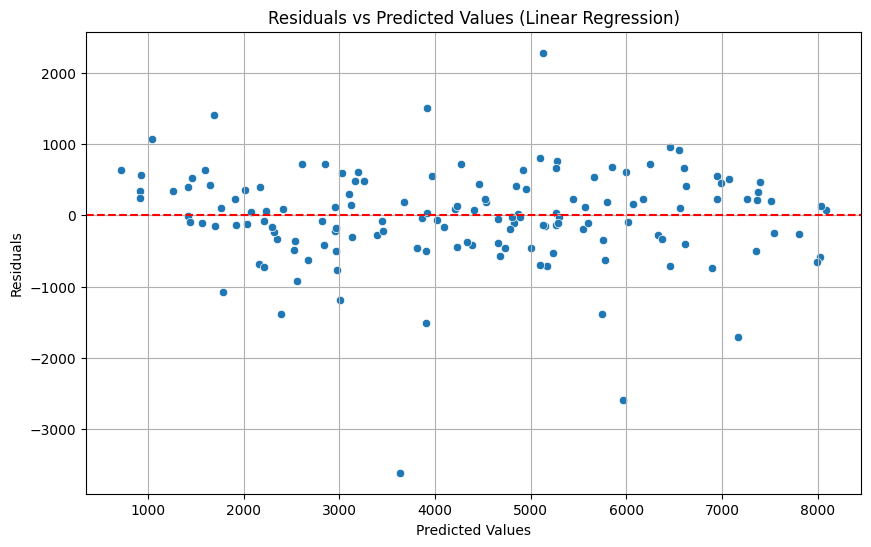

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_lr, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values (Linear Regression)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

**Random Forest Regressor**

In [10]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

Prediction

In [11]:
y_pred_rf = rf_model.predict(X_test)

**Feature importance for Random Forest model**

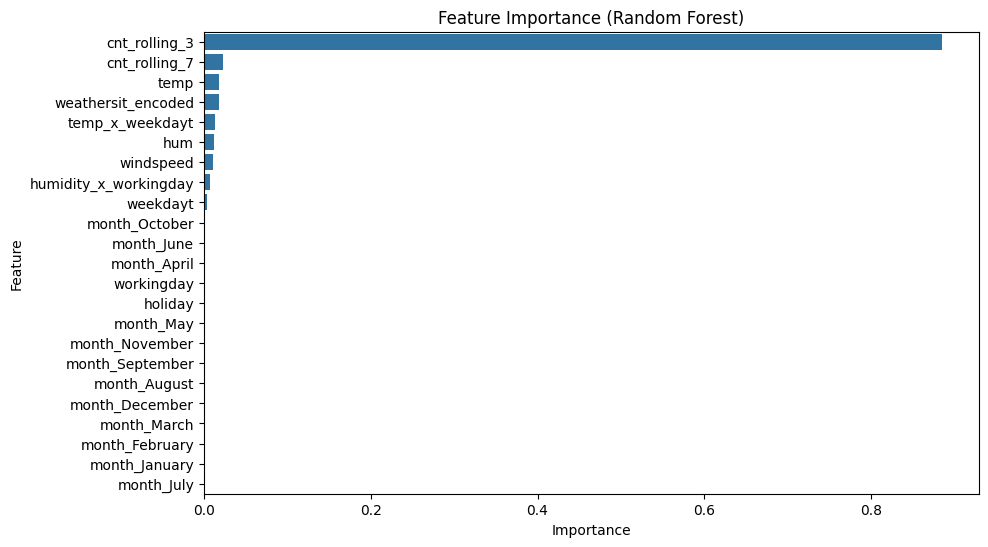

In [12]:
importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance (Random Forest)")
plt.show()

**MSE, RMSE and R^2 for Random Forest model**

In [13]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("R²:", r2_rf)

MSE: 400930.76441020414
RMSE: 633.1909383513034
R²: 0.90001433070699


**Residuals comparison**

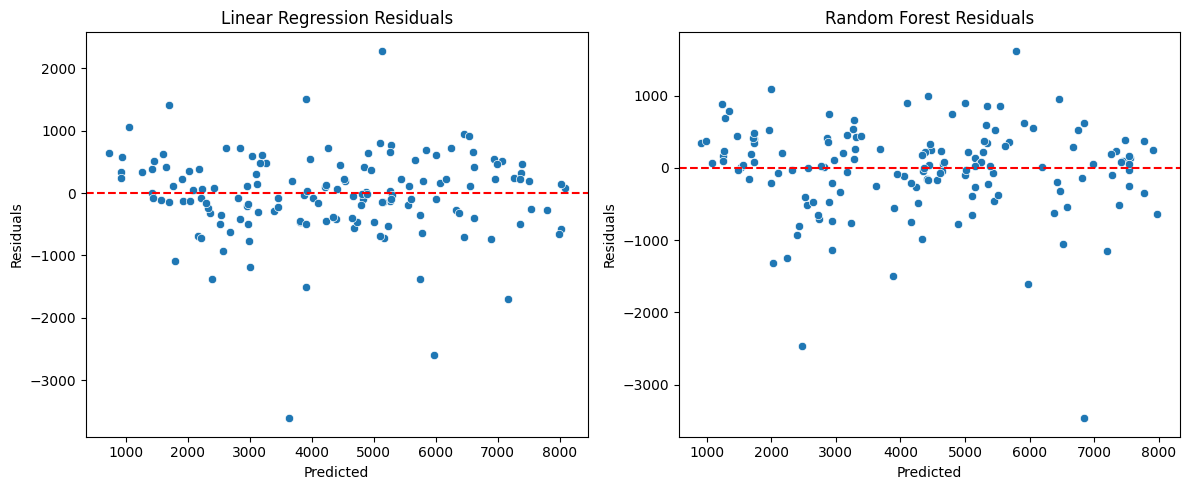

In [14]:
# Residuals for RF
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(12, 5))

# Linear Regression residuals
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred_lr, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Linear Regression Residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")

# Random Forest residuals
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred_rf, y=residuals_rf)
plt.axhline(0, color='red', linestyle='--')
plt.title("Random Forest Residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()

In [15]:
#table with comparison of Linear Regression Model vs Random Forest Model for MSE, RMSE R^2 
tabela = pd.DataFrame([
    {'Model': 'Linear Regression', 'MSE': mse, 'RMSE': rmse, 'R$^2$': r2},
    {'Model': 'Random Forest', 'MSE': mse_rf, 'RMSE': rmse_rf, 'R$^2$': r2_rf}
])
styled_table = tabela.style.format(precision=2).set_caption("<b>Model Comparison</b>").background_gradient(cmap='Blues')

styled_table

,Model,MSE,RMSE,R$^2$
0,Linear Regression,453386.93,673.34,0.89
1,Random Forest,400930.76,633.19,0.90


**Model GradientBoostingRegressor**

In [16]:
#Libraries 
from sklearn.ensemble import GradientBoostingRegressor
#model
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [17]:
#prediction
y_pred_gbr = gbr.predict(X_test)

**MSE, RMSE and R^2 for GradientBoostingRegressor**

In [18]:
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting - MSE:", mse_gbr)
print("Gradient Boosting - RMSE:", rmse_gbr)
print("Gradient Boosting - R²:", r2_gbr)

Gradient Boosting - MSE: 428186.8591712064
Gradient Boosting - RMSE: 654.3598850565386
Gradient Boosting - R²: 0.8932171000654314


**Table with Model comparison**

In [19]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'MSE': [mse, mse_rf, mse_gbr],
    'RMSE': [rmse, rmse_rf, rmse_gbr],
    'R²': [r2, r2_rf, r2_gbr]
})

styled_results = results.style.format(precision=2).set_caption("<b>Model comparison</b>").background_gradient(cmap='Blues')

styled_results


,Model,MSE,RMSE,R²
0,Linear Regression,453386.93,673.34,0.89
1,Random Forest,400930.76,633.19,0.90
2,Gradient Boosting,428186.86,654.36,0.89


Based on the comparison of results from different models, it can be concluded that the Gradient Boosting model best fits the data set. We will now try to do some tuning of hyperparameters.

**Tunning hyperparameters of Gradient Boosting model to optimize results**

In [20]:
from sklearn.model_selection import GridSearchCV

#parameters for test
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

gbr = GradientBoostingRegressor(random_state=42)

# Grid Search with 5 x validation
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Training
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [100, 200]},
             scoring='r2', verbose=2)

In [21]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated R²:", grid_search.best_score_)

Best parameters: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200}
Best cross-validated R²: 0.9010352318021368


**Based on found parameters we will build final model**

In [22]:
best_gbr = GradientBoostingRegressor(
    learning_rate=0.05,
    max_depth=4,
    n_estimators=200,
    random_state=42
)

best_gbr.fit(X_train, y_train)
y_pred_best = best_gbr.predict(X_test)

In [23]:
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

print("Final GBR - MSE:", mse_best)
print("Final GBR - RMSE:", rmse_best)
print("Final GBR - R²:", r2_best)

Final GBR - MSE: 430846.180632477
Final GBR - RMSE: 656.3887420061964
Final GBR - R²: 0.892553908163554


In [24]:
final_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Gradient Boosting Tunned'],
    'MSE': [mse, mse_rf, mse_gbr, mse_best],
    'RMSE': [rmse, rmse_rf, rmse_gbr, rmse_best],
    'R²': [r2, r2_rf, r2_gbr, r2_best]
})

styled_results_final = final_results.style.format(precision=2).set_caption("<b>Model comparison</b>").background_gradient(cmap='Blues')

styled_results_final

,Model,MSE,RMSE,R²
0,Linear Regression,453386.93,673.34,0.89
1,Random Forest,400930.76,633.19,0.90
2,Gradient Boosting,428186.86,654.36,0.89
3,Gradient Boosting Tunned,430846.18,656.39,0.89


**Saving model in .pkl**

In [25]:
import joblib

joblib.dump(best_gbr, 'final_bike_sharing_model.pkl')

['final_bike_sharing_model.pkl']

In [34]:
sample_input = {
    'temp': 0.65,
    'weekdayt': 2,
    'weathersit_encoded': 0,  # 0 = clear, 1 = mist/cloudy, 2 = light rain/snow
    'windspeed': 0.2,
    'hum': 0.55,
    'holiday': 0,
    'workingday': 1,
    
    
    # One-hot encoding of month (only one can be 1)
    'month_April': 0,
    'month_August': 0,
    'month_December': 1,  # ← selected month
    'month_February': 0,
    'month_January': 0,
    'month_July': 0,
    'month_June': 0,
    'month_March': 0,
    'month_May': 0,
    'month_November': 0,
    'month_October': 0,
    'month_September': 0,
    'cnt_rolling_3': 4500,
    'cnt_rolling_7': 4600,
    'temp_x_weekdayt': 0.65 * 2,
    'humidity_x_workingday': 0.55 * 1,
}

prediction = best_gbr.predict(pd.DataFrame([sample_input]))[0]
print(f"🚲 Predicted rentals: {round(prediction)}")

🚲 Predicted rentals: 4837


In [35]:
# Tolerance
tolerance = 0.10

# Predykcje i wartości rzeczywiste
y_pred = best_gbr.predict(X_test)
within_tolerance = np.abs(y_pred - y_test) <= (tolerance * y_test)

# accuracy-like
custom_accuracy = np.mean(within_tolerance)
print(f"Custom accuracy within ±10%: {custom_accuracy:.2%}")

Custom accuracy within ±10%: 57.14%


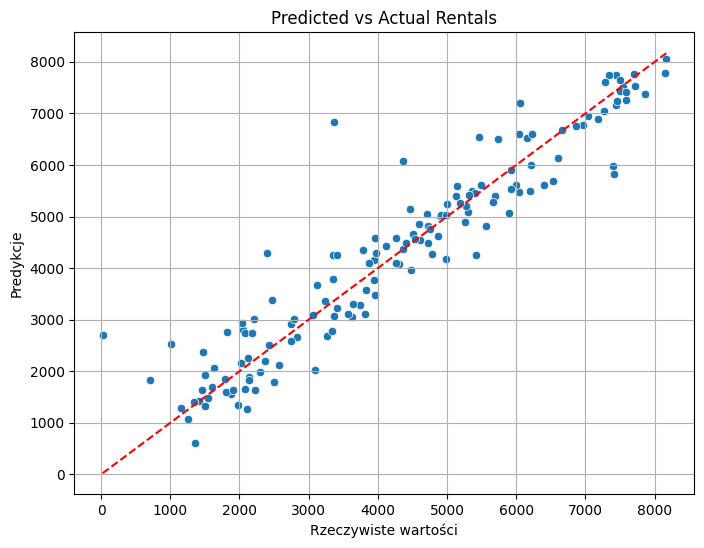

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Rzeczywiste wartości")
plt.ylabel("Predykcje")
plt.title("Predicted vs Actual Rentals")
plt.grid(True)
plt.show()

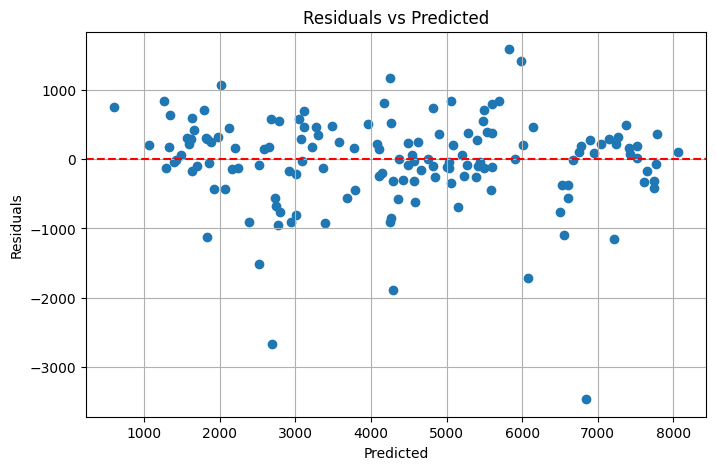

In [37]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.grid(True)
plt.show()